In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
data=pd.read_csv("Analysis of Super Store - DA.csv")
df=pd.DataFrame(data)
print(df.columns)
df.head()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [155]:
print(df.nunique())
print("rows,column: ",(df.shape)) 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64
rows,column:  (9994, 13)


In [198]:
print(df.describe())


        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


In [199]:
df.isnull().sum()
print(df["State"].unique())


['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [203]:
#Removing the duplicate 
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

In [219]:
# maximum State Sale
state_sales_df = pd.pivot_table(data=df[['State','Sales']], 
                        index=['State'], 
                        values='Sales',
                        aggfunc='max')

state_sales_df.sort_values(by='Sales', ascending=False).head(10)





,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


<Axes: title={'center': 'State vs Maximum Sales'}, xlabel='State', ylabel='Maximum Sales'>

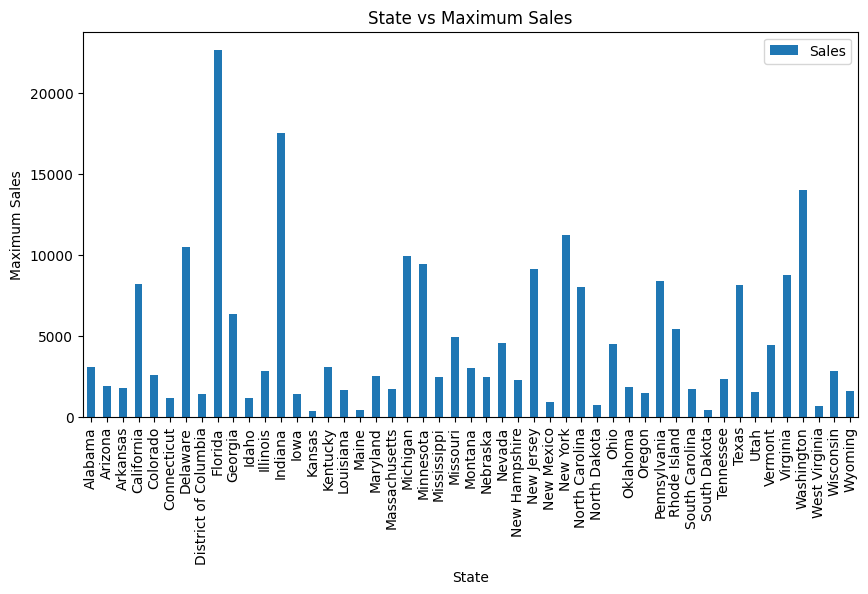

In [220]:
state_sales_df.plot(kind='bar', title='State vs Maximum Sales', ylabel='Maximum Sales',xlabel='State', figsize=(10, 5))


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

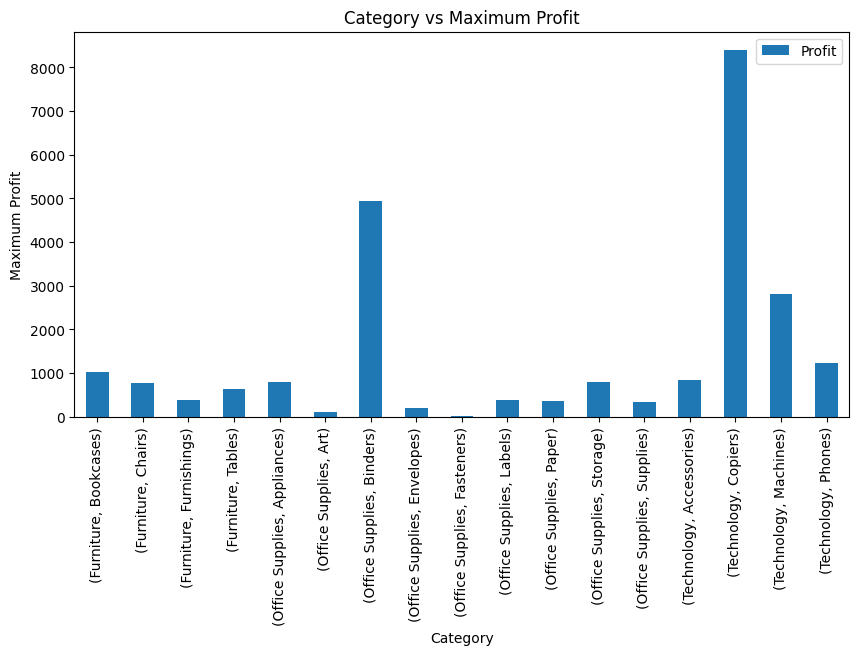

In [221]:
# Maximum category profit
#We have Category=3,Sub-Category=17

df_Category_profit = pd.pivot_table(data=df[['Category','Sub-Category','Profit']], 
                        index=['Category','Sub-Category'], 
                        values='Profit',
                        aggfunc='max')
df_Category_profit.plot(kind='bar', title='Category vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='Category', figsize=(10, 5))
df["Sub-Category"].unique()


In [222]:
#From above plot we can conclude that  Copiers of category technology have maximum sale

                         Profit
State                          
Alabama               1459.2000
Arizona                211.4955
Arkansas               843.1706
California            1906.4850
Colorado               247.9960
Connecticut            294.6710
Delaware              5039.9856
District of Columbia   648.5624
Florida                327.5922
Georgia               3177.4750
Idaho                  259.5297
Illinois               874.9875
Indiana               8399.9760
Iowa                   394.2680
Kansas                 149.3820
Kentucky              1416.8000
Louisiana              346.0396
Maine                  131.3550
Maryland              1270.9900
Massachusetts          503.7822
Michigan              4946.3700
Minnesota             4630.4755
Mississippi            388.8128
Missouri              2302.9671
Montana               1379.9770
Nebraska               743.9880
Nevada                1644.2913
New Hampshire          517.4793
New Jersey            2365.9818
New Mexi

<Axes: title={'center': 'State vs Maximum Profit'}, xlabel='State', ylabel='Maximum Profit'>

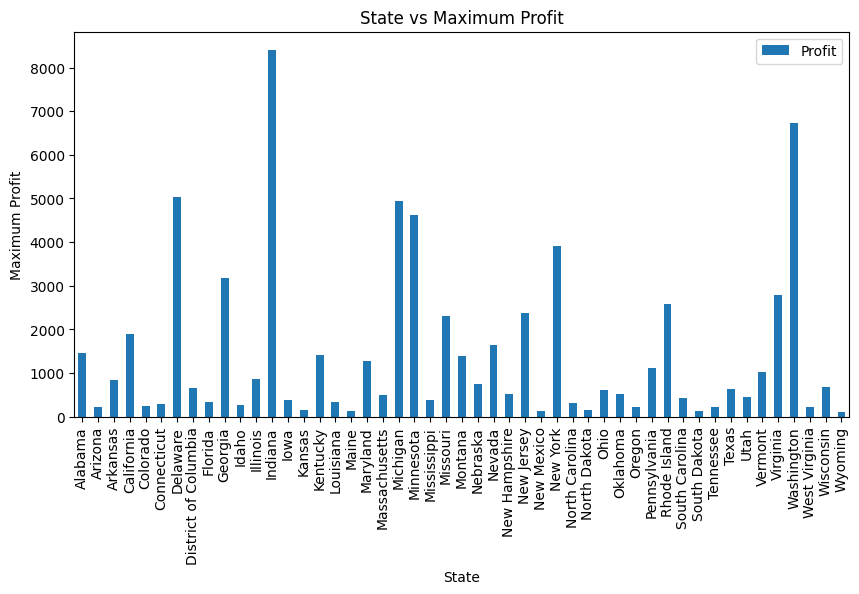

In [223]:
#Lets see State with Maximum Profit
state_profit_df = pd.pivot_table(data=df[['State','Profit']], 
                        index=['State'], 
                        values='Profit',
                        aggfunc='max')
print(state_profit_df)

state_profit_df.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',xlabel='State', figsize=(10, 5))

                                  Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810


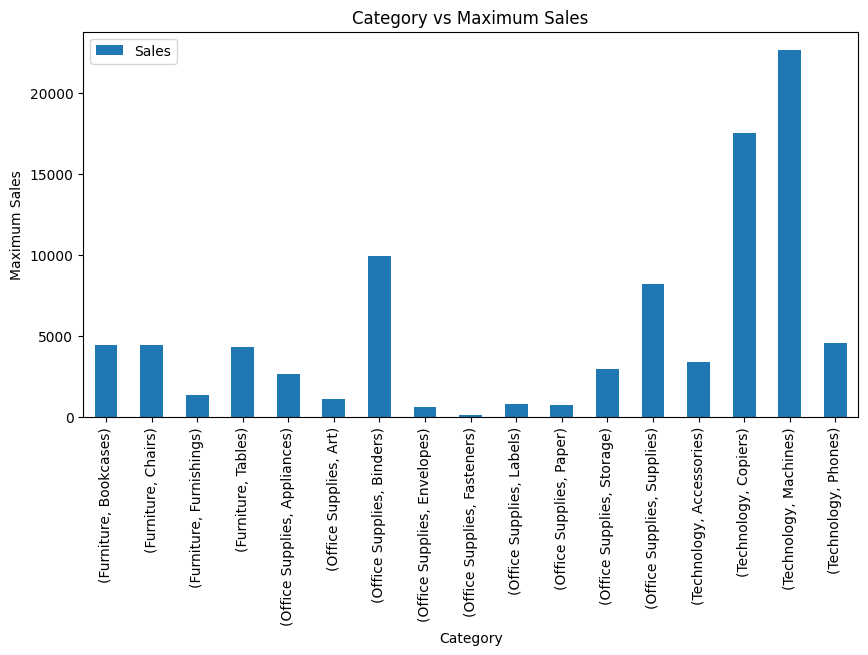

In [224]:
# Which Products are selling the most?
df_Category_sales = pd.pivot_table(data=df[['Category','Sub-Category','Sales']], index=['Category','Sub-Category'], values='Sales',aggfunc='max')
df_Category_sales.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',xlabel='Category', figsize=(10, 5))
print(df_Category_sales)

In [225]:
#Which Products are purchased in more quantity
df_Category_quantity = pd.pivot_table(data=df[['Category','Sub-Category','Quantity']], index=['Category','Sub-Category'], values='Quantity',aggfunc='sum')

df_Category_quantity



Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2351
                Furnishings       3560
                Tables            1241
Office Supplies Appliances        1729
                Art               2996
                Binders           5971
                Envelopes          906
                Fasteners          914
                Labels            1396
                Paper             5144
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

<Axes: title={'center': 'Category vs Sum of Quantity'}, xlabel='Category', ylabel='Sum of Quantity'>

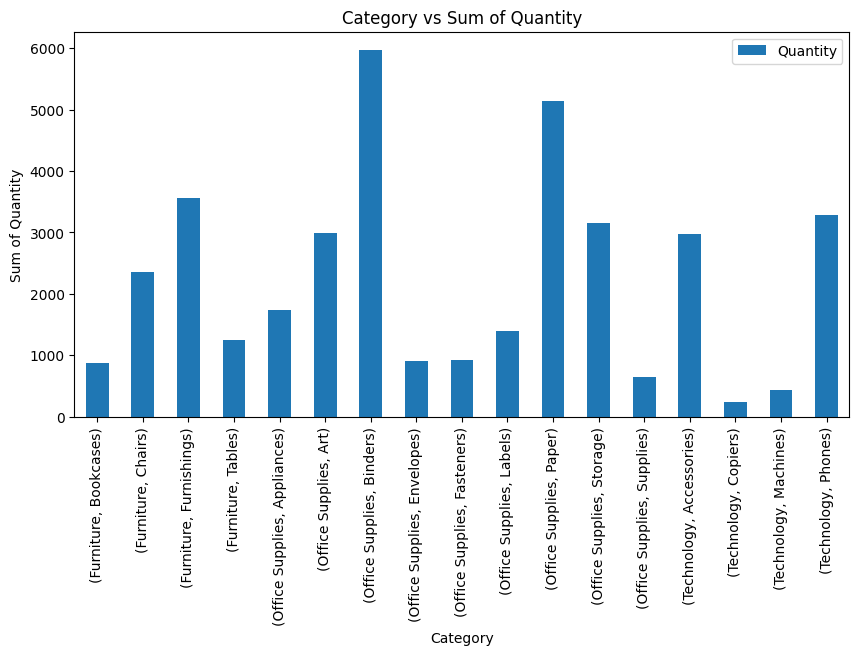

In [226]:
df_Category_quantity.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity',xlabel='Category', figsize=(10, 5))